# Machine Learning for Aerospace Engineers
### **Homework 1: Simple Linear Regression**

In this homework, we will get started with Python and analyze a simple dataset. We will study a *Convection-Duffsion-Reaction* problem which considers how a premixed flame moves and reacts within a chamber. What we're interested in is the maximum temperature observed in that chamber under different conditions. The details of this scenario aren't critical to understanding and completing this homework. 

### General Homework Policies 
* You must not import any python libraries unless the question explicitly asks you to do so. 
* Some exercises may have a free response question at the end. We are not looking for anything more than a short paragraph for these questions. In some cases, just a sentence will suffice. 

***
## Exercise 1: Loading and Initial Exploration of the Dataset

**10 Points**

Load the `CDRSamples.csv` dataset into your Jupyter notebook using the `pandas` library, which is widely used throughout the data-science world. This will load this `.csv` (which stands for comma-separated values) table into your notebook as a "DataFrame" object. This is a useful structure for manipulating spreadsheets programmatically. To receive full credit for this exercise, you must: 

- Import the `pandas` library and name it `pd` so we don't have to type out the whole name each time we use it. 
- Assign the `CDRSamples.csv` file as a Pandas Dataframe to a variable called `df`. 
- Print the number of rows contained in this dataframe. 
- Use a `for` loop to print out the range (max-min) of each column (You might find the `.min()` and `.max()` methods helpful)
- Display the first 5 rows of the dataset using the `.head()` method on the `df` variable

In [15]:
# YOUR CODE HERE 

# Import the "pandas" library and name it "pd" so we don't have to call the whole name each time we use it
import pandas as pd 

# Assign the 'CDRSamples.csv' file as a Pandas Dataframe to a variable called "df"
df = pd.read_csv("CDRSamples.csv")

# Print the number of rows in the dataframe 
print("Number of Rows: %d\n" % (len(df)))

# Use a for-loop to print out the range of each column 
for col in df.columns:
    print("%s Range: %.3f" % (col, df[col].max() - df[col].min()))

# 4.) Display the first 5 rows of the dataset using the .head() method on the "df" variable 
df.head()

Number of Rows: 120000

A Range: 1.000
E Range: 7993.996
Ti Range: 199.998
To Range: 149.991
phi Range: 1.000
T_max Range: 1228.266


,A,E,Ti,To,phi,T_max
0,0.222878,5088.944077,326.976714,947.452301,0.647133,1081.116584
1,0.112300,7461.429319,256.857257,975.464063,1.056249,1262.945975
2,0.004896,1513.376459,324.362214,915.987019,1.465834,1686.078741
3,0.277023,2469.082289,369.753997,970.686809,1.169102,1621.811163
4,0.239761,3434.308095,338.511066,978.108594,0.553839,1090.002244


***
## Exercise 2: Separating Input and Output Data

**10 Points**

As we can see from the first few rows of the dataset, each row represents a unique selection of our input variables and the corresponding maximum temperature associated with those input variables. These inputs will be called "features". Features are observable traits of the system that we feed in as inputs to a machine learning model. The input features we'll be using are: 

* **A** and **E** are paremeters of the Arrhenius Equation (scaled for numerical stability), which determines the rate of reaction's dependence on temperature. 
* **Ti** is the temperature at the inlet of the chamber. 
* **To** is the temperature at the outlet of the chamber. 
* **phi** is the fuel:oxidizer ratio of the premixed inflow. 

The output we'll be using is: 
* **T_max** is the maximum temperature observed in the chamber. 

Our goal of this exercise is to use linear regression to predict the maximum temperature in the chamber, **T_max**, given we know **A, E, Ti, To** and **phi**. To get credit for this exercise you must: 

- Create a new DataFrame called `X_df` that only contains the input features (**A, E, Ti, To** and **phi**). 
- Create a new DataFrame named `Y_df` of only the **T_max** column. 

In [16]:
# 1.) Create a new DataFrame named `X_df` of only the input features of the dataframe
X_df = df[['A', 'E', 'Ti', 'To', 'phi']]

# 2.) Create a new DataFrame named `Y_df` of only the `T_max` column. 
Y_df = df[['T_max']]

***
## Exercise 3: Plotting Relationships Between Inputs and Outputs
**10 Points**


Visualizing relationships between variables is an extremely important part of data analysis. When using Python, the most common plotting package is `matplotlib`. In this exercise, we will create a simple scatterplot between the Fuel:Oxidzer Ratio (**phi**) and the maximum temperature. To receive full credit for this exercise, you must: 

- Import the pyplot package from matplotlib and name it `plt` 
- Plot a scatterplot showing the relationship between the **phi** and **T_max** values. Fuel:Oxidizer Ratio should be on the X-Axis and Maximum Temperature should be on the Y-Axis. Adjust the size of the points of the scatterplot to 0.5. 
- Add a grid to the plot 
- Add appropriate X and Y Labels to the plot. 
- Add an appropriate title to the plot 

Text(0.5, 1.0, 'Maximum Temperature vs. Fuel:Oxidizer Ratio')

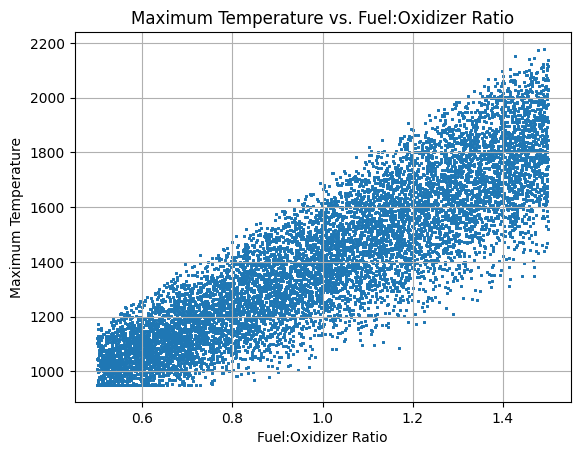

In [17]:
# 1.) Import the pyplot package from matploblib and name it 'plt' 
import matplotlib.pyplot as plt 

# 2.) Plot a scatterplot visualizing the relationship between the Fuel:Oxidizer Ratio and Maximum Temperature values 
plt.scatter(X_df['phi'], Y_df['T_max'], s = 0.5)

# 3.) Add a grid, axes labels and a title to the plot 
plt.grid()
plt.xlabel("Fuel:Oxidizer Ratio")
plt.ylabel("Maximum Temperature")
plt.title("Maximum Temperature vs. Fuel:Oxidizer Ratio")

***
## Exercise 4: Quantifying Feature-Output Relationships 
**10 Points**

We are interested in how much each feature is *corelated* with our output-of-interest, the maximum temperature (**T_max**). Recall that the Pearson Correlation Coefficient, $R$, is a measurement ranging from $\pm 1$ which determines the extent to which two variables are linearly correlated with one another. An $R$ value of 1.0 indicates a perfect positive correlation i.e. as one variable increases, the other variable increases proportionally. An $R$ value of -1.0 indicates a perfect negative correlation which means as one variable increases, the other decreases. An $R$ value of zero means the variables share no linear relationship with each other. The Pearson Correlation Coefficient between two random variables $X$ and $Y$ is computed using the following: 

$$ R = \frac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X) \text{Var}(Y)}} \approx \frac{\sum_{i=1}^N (x_i - \mu_x) (y_i - \mu_y)}{\sqrt{\left( \sum_{i=1}^N (x_i - \mu_x)^2 \right) \left(\sum_{i=1}^N (y_i - \mu_y)^2 \right)}}$$ 


To get full-credit for this exercise, you must: 

* Import the `numpy` library and rename it `np`. 
* Use a `for` loop to print out the feature name and its pearson correlation coefficient ($R$) for each of the input features with the maximum temperature (**T_max**). Do not use the `np.corrcoef` function. *Hint: you may find the `df.columns` attribute and the `np.var` and `np.cov` functions useful* 

In [18]:
# Import numpy library and rename it 'np' 
import numpy as np 

# Loop through the features of X_df and print out the feature name and correlation coefficient for each 
for feature in X_df.columns: 
    cov = np.cov(X_df[feature], Y_df['T_max'])[0,1]
    var_x = np.var(X_df[feature])
    var_y = np.var(Y_df['T_max'])
    rho = cov / np.sqrt(var_x * var_y )
    print("Correlation Coefficient for %s: %.3f" % (feature, rho))


Correlation Coefficient for A: 0.340
Correlation Coefficient for E: -0.265
Correlation Coefficient for Ti: 0.036
Correlation Coefficient for To: 0.152
Correlation Coefficient for phi: 0.882


### **Free Response:** Consider these correlation coefficients. Which feature will be most helpful in predicting maximum temperature? Which feature will be the least helpful? Why? 

*Your response here*

***
## Exercise 5: Least-Squares Regression with Numpy
**10 Points**

With this in mind, in this question, we will solve for a set of weights that solve the following least-squares regression problem: 


$$ \min_{\beta} ||X \beta - Y||_2^2 $$ 

Where $X \in \mathbb{R}^{N \times d}$, $\beta \in \mathbb{R}^{d}$ and $Y \in \mathbb{R}^{N}$. $N$ is the number of observations we have and $d$ is the number of features we have for each observation. The optimal $\beta$ value, i.e. the weights that optimally map the features of $X$ to the output $Y$ can be computed with the "normal equations" (we'll discuss this problem in much more detail in class, this exercise is just to get you familiar with matrix operations using NumPy): 

$$ \hat{\beta} = (X^\top X)^{-1} X^\top Y $$ 

**NOTE:** *Let's say we want to compute $A^{-1}B$. Using `np.linalg.inv(A) @ B` is significantly more expensive than using `np.linalg.solve(A,B)`. This is because we don't actually need to invert a matrix all the way to solve a linear system. It's good programming practice to get in the habit of using the `solve()` function wherever you can in place of the `inv()` function. In MATLAB the `solve()` function is the same as `A\B`.*  

In this exercise, we will compute $\hat{\beta}$ using NumPy. To receive credit for this question, you must: 

- Convert the `X` and `Y` dataframes into 2D Numpy Arrays (matrices) called `X` and `Y`
- Compute `beta_hat` using the second equation above. Use `np.linalg.solve()` to get avoid inverting the formed matrix and use `@` for matrix multiplication. 
- Print `beta_hat`

*NOTE: Make sure your matrix dimensions are correct when you multiply $X^\top X$. This should result in a 5x5 matrix. If you accidentally multiply $X X^\top$, this will result in a 120,000 x 120,000 matrix which may exceed the memory of your machine.* 

In [19]:
# 1.) Convert X_df and Y_df Dataframes into Numpy Arrays called X and Y
X = X_df.values
Y = Y_df.values

# 2.) Compute beta_hat using the normal equations 
beta_hat = np.linalg.solve(X.T @ X, X.T @ Y) 

# 3.) Print beta_hat 
print(beta_hat)

[[ 3.23706441e+02]
 [-3.12749145e-02]
 [ 1.18116759e-01]
 [ 5.85118168e-01]
 [ 8.31302630e+02]]


***
## Exercise 6: Function to Quantify Prediction Error
**10 Points**


A function is a reusable block of code that takes a set of *parameters* and executes some set of instructions based on those parameters. For example, if we didn't want to convert between Farenheit and Celsius by hand each time, we might write a function called `to_celsius(farenheit_temp)` that does it for us. The name of the function, `to_celsius` takes in a variable called `farenheit_temp` and then returns the conversion so you don't have to manually calculate it each time. This can be written in python with the following: 

In [20]:
def to_celsius(farenheit_temp):
    return (farenheit_temp - 32) * (5/9)

print(to_celsius(83))
print(to_celsius(32))

28.333333333333336
0.0


A crucial part of machine learning is developing a metrics that quantify the performance of a model. In the case of regression, we are interested in how "close" the model's predictions come to the true values. One way to check this error is with *Mean-Relative Error*. This is computed with the following equation: 

$$ MRE = \frac{1}{N} \sum_{i=1}^{N} \frac{|\hat{y}_i - y_i|}{y_i} $$ 

where $N$ is the total number of datapoints, $\hat{y}_i$ is the model's prediction for a specific input, and $y_i$ is the true output at that input. If we multiply MRE by 100, we get **Mean Percent Error**. 

To get credit for this exercise, you must: 

- Compute a `Y_hat` variable with the following expression: $ X \hat{\beta} = \hat{Y}$; this is the model's best guess at maximum temperature given the features of $X$. 
- Define a function called `compute_mre` which takes two parameters, `Y_pred` and `Y_true`, which are numpy vectors of the same length and returns the mean relative error between them.
- Call the function on your `Y_hat` vector you computed in the first step and the `Y` vector. Print the **Mean Percent Error** between these two vectors. 

In [27]:
# Compute a Y_hat variable using your beta_hat variable from the previous sections 
Y_hat = X @ beta_hat 

# Define a function compute_mre that takes Y_pred and Y_true as parameters and returns the MRE between them: 
def compute_mre(Y_pred, Y_true):
    Y_diff = np.abs(Y_pred - Y_true)/Y_true
    N = len(Y_diff) 
    
    return np.sum(Y_diff) / N 

# Print the Mean Percent Error of the model's predictions, Y_hat and the true values stored in the vector Y 
print("Model's Mean Percent Error: %.3f %% " %  (100*compute_mre(Y_hat, Y)))

Model's Mean Percent Error: 2.404 % 


### **Free Response:** In your own words, interpret this value. What does this say about how good or bad our linear regression is? 

*Your response here*

***
## Exercise 7: Visualizing Model Performance
**10 Points**

Oftentimes, it is useful to visualize the performance of a machine learning model to intuitively gauge how well the model has predicted the target values. 

* Import the `matplotlib.pyplot` module and rename it `plt` 
* Use `matplotlib` to plot a scatterplot of the `Y_hat`, or our model's predicted values on the X-Axis and `Y`, the true output values on the Y-Axis. Make the size of the points 0.5. 
* Add a grid, appropriate axis labels and a title to your plot 

Text(0.5, 1.0, 'Actual Max Temp vs. Predicted Max Temp')

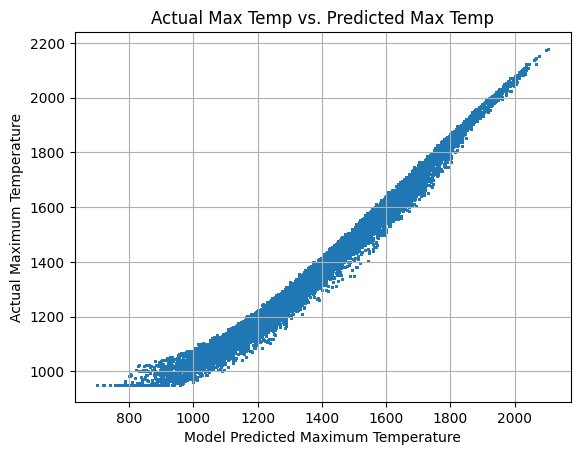

In [28]:
# Import the matplotlib.pyplot module and rename it 'plt' 
import matplotlib.pyplot as plt 

# PLot a scatterplot of Y_hat on the X-Axis and Y on the Y-Axis with appropriate sizing and labeling  
plt.scatter(Y_hat, Y, s = 0.5)
plt.grid()
plt.xlabel("Model Predicted Maximum Temperature")
plt.ylabel("Actual Maximum Temperature")
plt.title("Actual Max Temp vs. Predicted Max Temp")

### **Free Response:** Describe how well the linear regression model is able to predict the maximum temperature. If the model performs perfectly (i.e. it 100% matches the true output values), how would this scatterplot look? If the model performs poorly (i.e. encounters high error in its predictions), how would it look?

*Your response here*

***
## Exercise 8: Cross-Validation
**10 Points**

The model's mean squared error is a good metric to assess model performance, but by itself, it doesn't mean much. What we are interested in is how well the model *generalizes* to unseen data. This is the process of **Cross-Validation**. We have provided some code to take the `X_df` and `Y_df` and split them into "Train" and "Test" sets. The `test_size=0.20` argument means we will hold out 20% of our data from the training process to evaluate the model on unseen data. We will train our model on the training data, and then evaluate how well our model performs on the "Test" data. To get credit for this exercise, you must: 

* Compute a new `beta_hat` only using the training dataframes, like we did in **Exercise 5**. 
* Use the training `beta_hat` to compute `Yhat_train` and `Yhat_test` arrays. (Like we did in **Exercise 6**). 
* Use your `compute_mre` function in **Exercise 6** to compute variables called `train_mre` and `test_mre`, the Mean Relative Error of the training data and the MRE of the testing data. Print out the **Mean Percent Error** of the training and testing predictions. 

In [33]:
## CODE PROVIDED; DO NOT MODIFY ---------------------

# Importing Scikit-Learn library's train_test_split function 
from sklearn.model_selection import train_test_split

# Splitting the X_df and Y_df into training and testing pairs with 20% of the data being held out for testing 
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.20, random_state=42)

# Converting these from pandas dataframes into numpy arrays 
X_train, X_test, Y_train, Y_test = X_train.values, X_test.values, Y_train.values, Y_test.values

## BEGIN YOUR CODE: ---------------------------------

# Compute a new beta_hat using only the training data 
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train 

# Compute Yhat_train and Yhat_test arrays (i.e. model's predictions on X_train and X_test)
Yhat_train = X_train @ beta_hat 
Yhat_test = X_test @ beta_hat 

# Use the MRE function from Exercise 5 to compute train_mre and test_mre 
train_mre = compute_mre(Yhat_train, Y_train)
test_mre = compute_mre(Yhat_test, Y_test)
print("Training Mean Percent Error: %.5f %%" % (train_mre*100))
print("Testing  Mean Percent Error: %.5f %%" % (test_mre*100))

Training Mean Percent Error: 2.40570 %
Testing  Mean Percent Error: 2.39606 %


### **Free Response:** What do the Mean Percent Error values for the train and test sets tell you? Has our model done a good job of generalizing to unseen data? 

*Your response here*

***
## Exercise 9: Cross-Validation with Polynomial Features
**10 Points**


Because the model fit the data pretty well, we are now going to examine what happens when we add too many features. The provided code does a few things. First, we are only using 100 total datapoints. Second, we're going to add polynomial features up to order 3, using the `sklearn` library. This means that instead of simply having our parameters A, E, Ti, To, and Tmax as features, we will use every combination of these up to cubic nonlinearity (e.g. $AE^2$, $T_i^3$, $A T_o T_{max}$, etc). With nonlinear features, we are now able to capture nonlinear relationships between our features. 

To get credit for this exercise, please repeat the steps of **Exercise 8** on this new dataset. 

In [32]:
## CODE PROVIDED; DO NOT MODIFY ---------------------

# Importing Scikit-Learn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 

# Defining how many datapoints to use in our analysis 
n_datapoints = 100

# Splitting the X_df and Y_df into training and testing pairs with 20% of the data being held out for testing 
X_train, X_test, Y_train, Y_test = train_test_split(X_df.loc[:n_datapoints,:], Y_df.loc[:n_datapoints,:], test_size=0.20, random_state=42)

# Converting these from pandas dataframes into numpy arrays 
X_train, X_test, Y_train, Y_test = X_train.values, X_test.values, Y_train.values, Y_test.values

# Generating polynomial features up to order 3 on the training/testing inputs 
poly_features = PolynomialFeatures(degree=3)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.transform(X_test)

## BEGIN YOUR CODE: ---------------------------------

# Compute a new beta_hat using only the training data 
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train 

# Compute Yhat_train and Yhat_test arrays (i.e. model's predictions on X_train and X_test)
Yhat_train = X_train @ beta_hat 
Yhat_test = X_test @ beta_hat 

# Use the compute_mre function from Exercise 5 to compute train_mre and test_mre
train_mre = compute_mre(Yhat_train, Y_train)
test_mre = compute_mre(Yhat_test, Y_test)
print("Training Mean Percent Error: %.5f %% " % (train_mre * 100))
print("Testing  Mean Percent Error: %.5f %% " % (test_mre * 100))

Training Mean Percent Error: 0.07155 % 
Testing  Mean Percent Error: 0.47662 % 


### **Free Response:** How does the nonlinear model compare to the linear model? What do the MRE Values for the train and test-set tell us? Explain what you think might be going on here. (Hint: What dimension is `beta_hat` now?)

*Your response here*

***
## Exercise 10: Conceptual Wrap-Up 
**10 Points** 

### **Free Response:** If you've completed the homework up to this point, you should have successfully trained a machine learning model on a relatively large dataset with over 100,000 points (woohoo!). In what ways is a linear regression model useful? In what ways is it limited or could be improved? Be specific based on the theory we covered in class. 

*Your response here*
***